# Latent Variable Model over a Set of trajectories

In [41]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Conv2D
tfd = tfp.distributions

from matplotlib import pyplot as plt
import collections

# Generate data

In [2]:
trajectories = []
num_trajectories = 5
num_steps = 1000

theta = np.arange(0,np.pi/2.0+(np.pi/2.0)/(num_steps-1),(np.pi/2.0)/(num_steps-1))
radius = 2

r1 = (2*radius)*np.cos(theta-np.pi)
r2 = (2*radius)*np.cos(theta)

loc = 0
scale = 0.05

# generate trajectories
for i in range(num_trajectories):
    
    # sample state space noise (arc1 + arc2)
    noise1 = np.random.normal(loc, scale, size=len(theta))
    noise2 = np.random.normal(loc, scale, size=len(theta))
    

    # generate state action pairs
    s = np.hstack([r2*np.cos(theta)+noise1, np.flip(r1*np.cos(theta)+noise2)]).T
    a = np.hstack([r2*np.sin(theta), r1*np.sin(theta)]).T
    
    # reverse trajectory path (if 0.5 < rand < 0.75 the leave s,a as they are )   
    if np.random.rand() < 0.5:
        a = -1*a
    elif np.random.rand() > 0.75:
        s = -1*s
            
    traj = np.array([s,a]).T
    trajectories.append(traj)

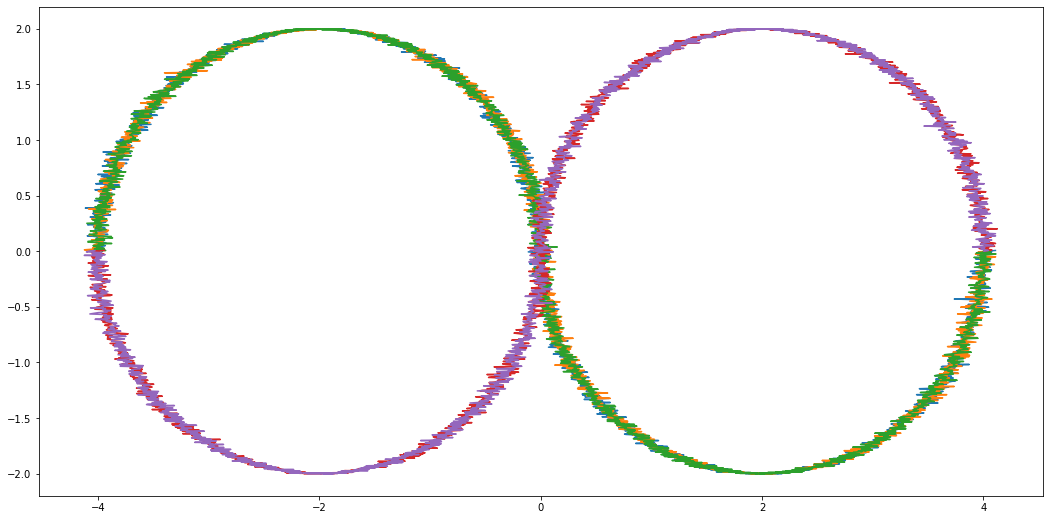

In [3]:
plt.figure(figsize=(18,9))
for traj in trajectories:
    plt.plot(traj[:,0],traj[:,1])

plt.show()

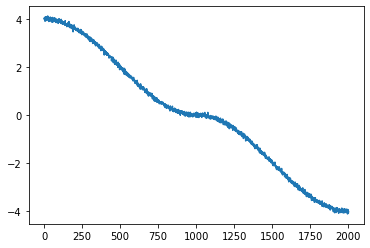

In [7]:
plt.plot(s)

(array([410., 180., 148., 132., 131., 131., 132., 148., 180., 410.]),
 array([-1.99999753e+00, -1.59999802e+00, -1.19999852e+00, -7.99999011e-01,
        -3.99999506e-01,  2.22044605e-16,  3.99999506e-01,  7.99999011e-01,
         1.19999852e+00,  1.59999802e+00,  1.99999753e+00]),
 <BarContainer object of 10 artists>)

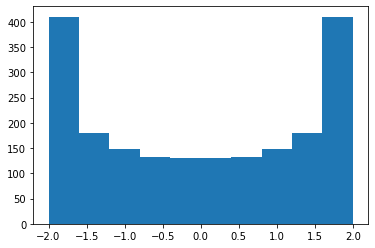

In [5]:
plt.hist(a)

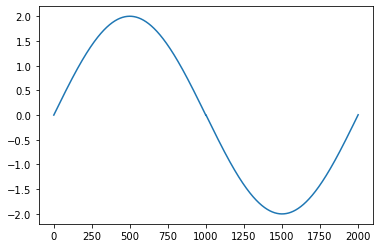

In [100]:
plt.plot(a)

## Model Assumptions
$$p(z) = Uniform(K)$$
Where $K$ is the number of trajectories.

$$
\begin{matrix}
\pi(a|s)&=& \int \underbrace{\pi(a|s,z)}_{\text{policy for single task}} p(z)dz\\
&=& E_{z \sim p(z)}\left[\pi(a|s,z)\right]\\
&\approx& \frac{1}{K}\sum\limits_{k=1}^{K}\pi(a|s,z_k),\quad z_k \sim p(z)
\end{matrix}
$$
$p(z)$ is the distribution over tasks/trajectories and can be uniform.

Let 
$$
\pi(a|s,z) = \mathcal{N}\left(g_{\theta}(s,z),\sigma^2\right)
$$

$\tiny \text{Sidenote: At the moment,} \,g_{\theta} \,\text{is a neural-network output, but can we also use a DMP (Dynamic Motion Primitive) here?}$


# Procedure

- Sample a $K$ number of $z$'s
    1. For each $z_k$, Sample N $(s_i,a_i)$ pairs
    2. Build a dataset $\mathcal{D} = \left\{z_k,s_i,a_i\right\}^{K\times (S \times A)}_{i=1}$
- Do forward pass on neural net with input sample $(z,s) \sim \mathcal{D}$ to obtain output $g_{\theta}$, i.e.:

$$\pi_{\theta}(a|s)\approx \frac{1}{K}\sum\limits_{k=1}^{K}\mathcal{N}\left(g_{\theta}(s,z_k),\sigma^2\right)$$

### Define $p(z)$
$$ p(z) = Uniform(K)$$

In [30]:
# construct distribution of z's
probs = np.ones(num_trajectories)/num_trajectories
Pz = tfd.Categorical(logits=probs)

### Define $\mathcal{D}$

In [97]:
# Queue for storing the data
D = collections.deque()

## 1. Construct dataset $\mathcal{D}$

Sample $m$ trajectories out of $K$ according to:
$$z \sim p(z) = Uniform(K)$$
$$(s,a) \sim p(s,a|z) = Uniform(T),$$
$T$ is the number of timesteps

$\tiny \text{or just}\quad s \sim p(s)= \int p(s,a)da$

$\tiny \text{sample once for now, but later sample m trajectories}$

In [98]:
# construct dataset (place for each z loop here)
M = num_trajectories
for m in range(M):
    z = Pz.sample()
    traj = trajectories[z]

    # augment trajectory with z
    Z = np.ones((traj.shape[0],1))*z.numpy()
    data_samples = np.hstack([Z,traj])
    for sample in data_samples:
        D.append(sample)

## 2. Evaluate likelihood

- Do forward pass on neural net with input sample $(z,s) \sim \mathcal{D}$ to obtain output $g_{\theta}$, i.e.:

$$\pi_{\theta}(a|s)\approx \frac{1}{K}\sum\limits_{k=1}^{K}\mathcal{N}\left(g_{\theta}(s,z_k),\sigma^2\right)$$

### Define Model $g_{\theta}$

$\tiny \text{Choosing to encapsulate the model with Keras Model API}$

In [99]:
state_dim = 1
action_dim = 1

# model layers (output = activation(dot(input, kernel) + bias))
inputs = tf.keras.Input(shape=(state_dim,))

l1 = Dense(15, activation='relu', name="l1")(inputs)
l2 = Dense(15, activation='relu', name="l2")(l1)
g = Dense(action_dim, activation='tanh', name="g_theta")(l2)





# model outputs
outputs = {"Loc": g}

model = tf.keras.Model(inputs, outputs) 

## 4. Model using negative log likelihood loss

We use negative log likelihood, i.e.:

$$log \pi_{\theta}(a|s)\approx log\frac{1}{K}\sum\limits_{k=1}^{K}\mathcal{N}\left(g_{\theta}(s,z_k),\sigma^2\right)$$

# Fit Trajectories

In [674]:
K = num_trajectories
for 
np.random.randint(5)

SyntaxError: invalid syntax (<ipython-input-674-ab7e12b06a21>, line 2)